<a href="https://colab.research.google.com/github/Basalas10/timeless-journey/blob/main/DSC600_Week5_Salas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week 5: Model Bias
# Assignment: Building and Training Multi-layered Perceptron and Testing Bias


Note 1: Before you run this notebook and start answering questions, I highly suggest that you click the "Runtime" menu at the top, then select "Change Runtime Type", finally select "T4 GPU". What this does is give you access to a dedicated GPU (Graphics Processing Unit). If you are unfamiliar this is video card of sorts which is really good at this sort of processing. If you don't do this then you can expect this notebook to take over an hour to run. (With the GPU it will still take a while)

Note 2: Don't change any of the code until after you have run the notebook and know the provided code works.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical, plot_model
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


# Synthetic Data Generation:

We simulate 900 samples (300 samples per class) for our thyroid disorder model. Each class is given a slight offset in the feature distribution (e.g., normal is centered around 0, hyperthyroidism around +1, and hypothyroidism around -1) to mimic differences in clinical measurements.

In [3]:
#### Data Generation: Simulating A Thyroid Disorder Dataset ####
# Features: Age, Sex, On Thyroxine, Pregnant, Thyroid Surgery Status,
#           Goiter, Hypopituitary, TSH Level, T3 Level, TT4, T4U, FTI
# Output class: 0 = Normal Functioning, 1 = Hyperthyroidism, 2 = Hypothyroidism

num_features = 12
num_classes = 3
samples_per_class = 300  # simulate 300 samples per class
total_samples = samples_per_class * num_classes

# Initialize arrays for features (X) and labels (y)
X = np.zeros((total_samples, num_features))
y = np.zeros(total_samples, dtype=int)

# Class 0 (Normal Functioning): features drawn from N(0,1)
for i in range(samples_per_class):
    X[i] = np.random.randn(num_features) + 0.0
    y[i] = 0

# Class 1 (Hyperthyroidism): simulate slightly higher feature values
for i in range(samples_per_class, 2 * samples_per_class):
    X[i] = np.random.randn(num_features) + 1.0
    y[i] = 1

# Class 2 (Hypothyroidism): simulate slightly lower feature values
for i in range(2 * samples_per_class, total_samples):
    X[i] = np.random.randn(num_features) - 1.0
    y[i] = 2

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# For multiclass classification, one-hot encode the labels
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Model Building:

The create_model() function builds a simple MLP with one hidden layer of 8 neurons followed by an output layer with 3 neurons (for three classes). The use_bias flag controls whether bias terms are used in both layers. By switching this flag, you can observe the model’s behavior with and without bias.



In [5]:
#### Model Creation Function ####
# This function returns a simple MLP with one hidden layer and one output layer.
# The parameter 'use_bias' controls whether bias is added in each Dense layer.
def create_model(use_bias=True):
    model = Sequential(name=f"MLP_use_bias_{use_bias}")
    # Hidden layer with 8 neurons. Activation is relu.
    # The use_bias parameter demonstrates the effect of including a bias term.
    model.add(Dense(8, activation='relu', use_bias=use_bias, input_dim=num_features, name='hidden_layer'))
    # Output layer with 3 neurons (one per class) using softmax activation for classification.
    model.add(Dense(num_classes, activation='softmax', use_bias=use_bias, name='output_layer'))

    model.compile(optimizer=Adam(learning_rate=0.01),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Training and Evaluation:

We train two models—one with bias and one without—and print their test accuracies so that students can observe the impact on performance.



In [6]:
#### Training Models: With and Without Bias ####

# Model WITH bias
model_with_bias = create_model(use_bias=True)
print("Training model WITH bias...")
history_with_bias = model_with_bias.fit(X_train, y_train_cat, epochs=50, batch_size=16, verbose=0)
loss_with, acc_with = model_with_bias.evaluate(X_test, y_test_cat, verbose=0)
print(f"With Bias - Test Accuracy: {acc_with:.3f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model WITH bias...
With Bias - Test Accuracy: 0.939


In [7]:
# Model WITHOUT bias
model_without_bias = create_model(use_bias=False)
print("\nTraining model WITHOUT bias...")
history_without_bias = model_without_bias.fit(X_train, y_train_cat, epochs=50, batch_size=16, verbose=0)
loss_without, acc_without = model_without_bias.evaluate(X_test, y_test_cat, verbose=0)
print(f"Without Bias - Test Accuracy: {acc_without:.3f}")



Training model WITHOUT bias...
Without Bias - Test Accuracy: 0.878


# Visualization:
Network Architecture: An optional diagram (saved as an image) shows the input/output shapes and layer names.



Model architecture diagram saved as 'MLP_with_bias.png'.


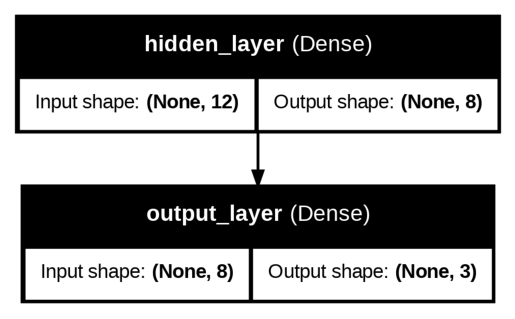

In [8]:
#### Optional: Visualizing the Network Architecture ####
# This step saves an image of the model’s architecture, including input/output shapes.
try:
    plot_model(model_with_bias, to_file='MLP_with_bias.png', show_shapes=True, show_layer_names=True)
    print("Model architecture diagram saved as 'MLP_with_bias.png'.")
except Exception as e:
    print("Unable to save model diagram. Ensure that pydot and graphviz are installed.")

# Read the image from the file
img = mpimg.imread('./MLP_with_bias.png')

# Display the image
plt.imshow(img)
plt.axis('off')  # Optional: Hide the axis ticks
plt.show()


# Weights & Biases:
A heatmap displays the hidden layer weight matrices. A bar chart shows the bias values (only available in the model with bias).

Accuracy Comparison: A plot comparing training accuracies clearly illustrates the effect of including bias on learning dynamics.

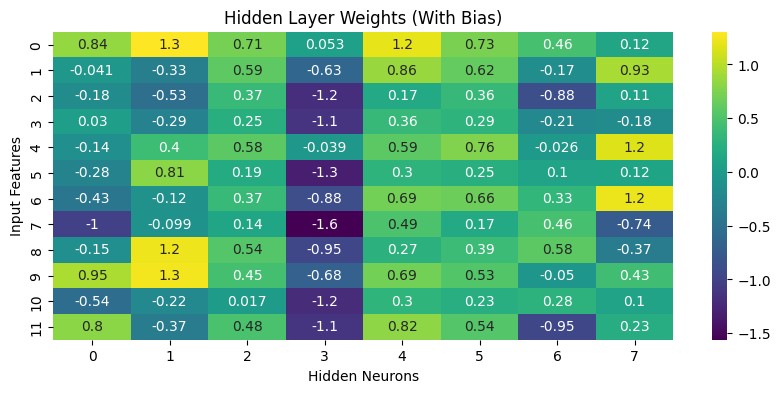

In [9]:
#### Visualizing Weights and Bias in the Hidden Layer ####
# Retrieve weight matrices from the hidden layer in the model WITH bias.
weights_with = model_with_bias.get_layer('hidden_layer').get_weights()
w_matrix_with = weights_with[0]  # Weight matrix shape: (num_features, 8)
bias_vector_with = weights_with[1]  # Bias vector shape: (8,)

# Heatmap of hidden layer weight matrix (With Bias)
plt.figure(figsize=(10, 4))
sns.heatmap(w_matrix_with, annot=True, cmap='viridis')
plt.title("Hidden Layer Weights (With Bias)")
plt.xlabel("Hidden Neurons")
plt.ylabel("Input Features")
plt.show()

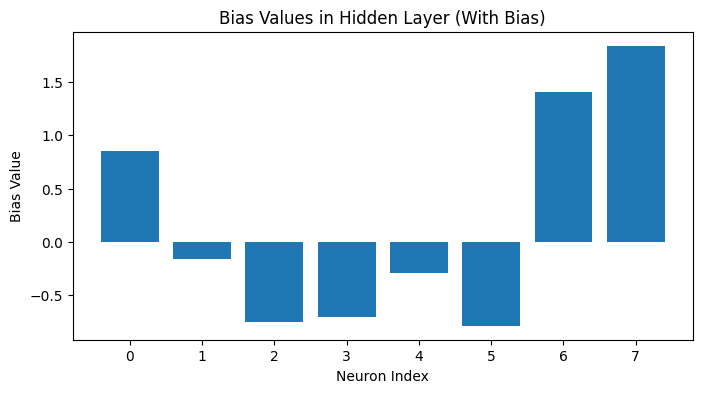

In [10]:
# Bar chart to show bias values for the hidden layer (With Bias)
plt.figure(figsize=(8,4))
plt.bar(np.arange(len(bias_vector_with)), bias_vector_with)
plt.title("Bias Values in Hidden Layer (With Bias)")
plt.xlabel("Neuron Index")
plt.ylabel("Bias Value")
plt.show()

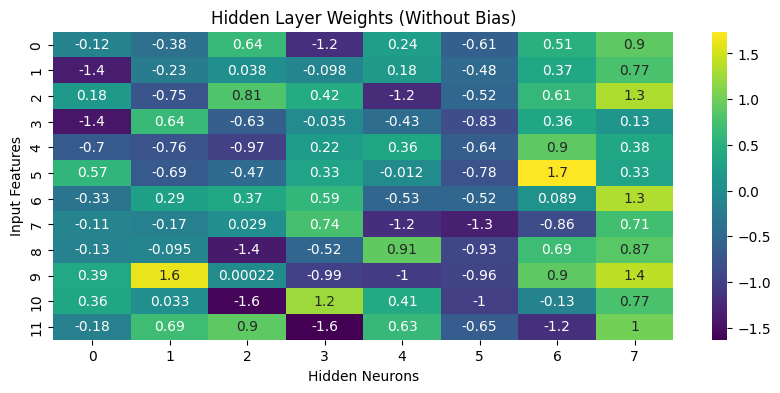

In [11]:
# Retrieve and visualize the weight matrix for the model WITHOUT bias
weights_without = model_without_bias.get_layer('hidden_layer').get_weights()
w_matrix_without = weights_without[0]

plt.figure(figsize=(10, 4))
sns.heatmap(w_matrix_without, annot=True, cmap='viridis')
plt.title("Hidden Layer Weights (Without Bias)")
plt.xlabel("Hidden Neurons")
plt.ylabel("Input Features")
plt.show()

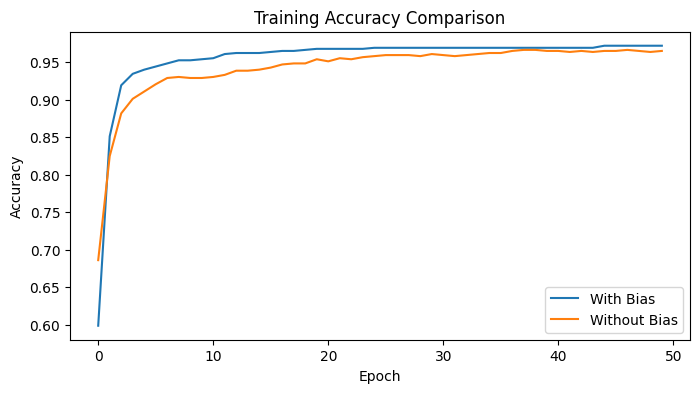

In [12]:
#### Comparing Training Accuracy Over Epochs ####
plt.figure(figsize=(8,4))
plt.plot(history_with_bias.history['accuracy'], label='With Bias')
plt.plot(history_without_bias.history['accuracy'], label='Without Bias')
plt.title("Training Accuracy Comparison")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


Evaluation Questions

1. Understanding the Role of Bias: In the context of our Multi-Layer  Perceptron, what is the purpose of including a bias term in each Dense layer? Describe in your own words how the bias impacts the output of the activation function and the overall flexibility of the model.
   
2. Performance Comparison: Compare the training accuracy and convergence behavior between the model trained with bias and the one without bias. What differences did you observe, and what do these differences tell you about the importance of bias in neural network learning?
      
3. Weight Matrix Visualization Analysis: Examine the heatmaps of the hidden layer weight matrices for both models. What patterns or variations do you notice,
